<a href="https://colab.research.google.com/github/muriloWeber/analise_dados_Python_Unopar/blob/main/algoritmosDeOrdenacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INTRODUÇÃO

"Quase todos os dados são mais úteis quando estão ordenados." (STEPHENS, 2013, p. 175)

Com essa afirmação, iniciamos esta etapa de estudos, na qual estudaremos cinco algoritmos de ordenação. Além de ser útil trabalhar com dados ordenados, estudar essa classe de algoritmos permite explorar várias técnicas de programação, tais como a recursão e o problema de dividir para conquistar. Com esse conhecimento, podemos arriscar dizer que você, desenvolvedor, passará de um nível de conhecimento mais "usuário" para um nível mais técnico, mais profundo, o que lhe capacitará a entender vários mecanismos que estão por trás de funções prontas que encontramos no dia a dia.

# APLICAÇÕES DOS ALGORITMOS DE BUSCA

São inúmeras as aplicações que envolvem a necessidade de dados ordenados. Podemos começar mecionando o algoritmo de busca binária, que exige que os dados estejam ordenados. No dia a dia, podemos mencionar a própria lista de chamadas, que possui dados ordenados que facilitam a localização dos nomes. Levando em consideração o hype da área de dados, podemos enfatizar a importância de algoritmos de ordenação, visto que alguns algoritmos de aprendizado de máquina exigem que os dados estejam ordenados para que possam fazer a previsão de um resultado, como a regressão linear.

Em Python, existem duas formas já programadas que nos permitem ordenar uma sequência: a função built-in sorted() e o método sort(), presente nos objetos da classe list. Observe o código a seguir.


In [2]:
lista = [10, 4, 1, 15, -3]

lista_ordenada1 = sorted(lista)
lista_ordenada2 = lista.sort()

print('lista = ', lista, '\n')
print('lista_ordenada1 = ', lista_ordenada1)
print('lista_ordenada2 = ', lista_ordenada2)
print('lista = ', lista)

lista =  [-3, 1, 4, 10, 15] 

lista_ordenada1 =  [-3, 1, 4, 10, 15]
lista_ordenada2 =  None
lista =  [-3, 1, 4, 10, 15]


Na entrada 1, temos dois recursos que ordenam uma lista, mas com diferentes comportamentos (RAMALHO, 2014). A função built-in sorted() cria uma nova lista para ordenar e a retorna, razão pela qual, como resultado da linha 7, há uma lista ordenada, guardada dentro da variável lista_ordenada1. Por sua vez, o método sort(), da classe list, não cria uma nova lista, uma vez que faz a ordenação "inplace" (ou seja, dentro da própria lista passada como parâmetro). Isso justifica o resultado obtido pela linha 8, que mostra que, dentro da variável lista_ordenada2, está o valor None e, também, o resultado da linha 9, em que pedimos para imprimir a lista que agora está ordenada! Em Python, por padrão, quando uma função faz a alteração inplace, ela deve retornar o valor None (RAMALHO, 2014). Logo, concluímos que: 1) a função built-in sorted() não altera a lista original e faz a ordenação em uma nova lista; e 2) o método sort() faz a ordenação na lista original com retorno None.

Como "programadores usuários", temos essas duas opções para ordenar uma lista em Python, certo? E como profissionais de tecnologia que entendem o algoritmo que está por trás de uma função? Para alcançarmos esse mérito, vamos então conhecer cinco algoritmos de ordenação.
A essência dos algoritmos de ordenação consiste em comparar dois valores, verificar qual é menor e colocar na posição correta. O que vai mudar, neste caso, é como e quando a comparação é feita. Para que possamos começar a entender a essência dos algoritmos de ordenação, observemos o código a seguir.

In [3]:
lista = [7, 4]

if lista[0] > lista[1]:
  aux = lista[1]
  lista[1] = lista[0]
  lista[0] = aux

print(lista)

[4, 7]


O código na entrada 2 mostra como fazer a ordenação em uma lista com dois valores. Veja, na linha 3, que a ordenação consiste em comparar um valor e seu vizinho. Caso o valor da posição mais à frente seja menor, então deve ser feita a troca de posições. Para fazer a troca, usamos uma forma mais clássica, na qual uma variável auxiliar é criada para guardar, temporariamente, um dos valores (no nosso caso estamos guardando o menor). Na linha 5, colocamos o valor maior na posição da frente e, na linha 6, resgatamos o valor da variável auxiliar colocando-a na posição correta.

A sintaxe adotada para fazer a troca no código da entrada 2 funciona para qualquer linguagem de programação. No entanto, como você já deve ter notado, em Python há "mágicas". Podemos fazer a troca usando a atribuição múltipla. Nesse caso, a atribuição é feita de maneira posicional: o primeiro valor após o sinal de igualdade vai para a primeira variável, e assim por diante. Veja, a seguir, o mesmo exemplo, agora com uma notação pythônica.

In [4]:
lista = [5, -1]

if lista[0] > lista[1]:
  lista[0], lista[1] = lista[1], lista[0]

print(lista)

[-1, 5]


Pois bem, ordenar significa comparar e escolher o menor. Fizemos isso para uma lista com dois valores. E se tivéssemos três deles, como faríamos a comparação e ordenação? É justamente esse "como" que dá origem aos diversos algoritmos de ordenação. Para nosso estudo, vamos dividir os algoritmos nestes dois grupos, de acordo com a complexidade:

1. Complexidade O(N2): neste grupo estão os algoritmos selection sort, bubble sort e insertion sort. Esses algoritmos são lentos para ordenação de grandes listas, porém são mais intuitivos de entender e possuem uma codificação mais simples.

2. Complexidade O(N log N): deste grupo, vamos estudar os algoritmos merge sort e quick sort. Tais algoritmos possuem performance superior, porém são um pouco mais complexos de serem implementados.

# SELECTION SORT (ORDENAÇÃO POR SELEÇÃO)

O algoritmo selection sort recebe esse nome, porque faz a ordenação sempre escolhendo o menor valor para ocupar uma determinada posição. Para entendermos como funciona o algoritmo, suponha que exista uma fila de pessoas, mas que, por algum motivo, elas precisem ser colocadas por ordem de tamanho, do menor para o maior. Essa ordenação será feita por um supervisor. Segundo o algoritmo selection sort, esse supervisor olhará para cada uma das pessoas na fila e procurará a menor delas. Quando encontrá-la, essa pessoa trocará de posição com a primeira. Veja que, agora, a primeira pessoa da fila está na posição correta, pois é a menor. Em seguida, o supervisor precisa olhar para as demais e escolher a segunda menor pessoa; quando encontrá-la, a pessoa troca de lugar com a segunda. Agora as duas primeiras pessoas da fila estão ordenadas. Esse mecanismo é feito até que todos estejam em suas devidas posições. Portanto, a lógica do algoritmo é a seguinte:

Iteração 1: percorre toda a lista, procurando o menor valor para ocupar a 
posição 0.

Iteração 2: a partir da posição 1, percorre toda a lista, procurando o menor valor para ocupar a posição 1.

Iteração 3: a partir da posição 2, percorre toda a lista, procurando o menor valor para ocupar a posição 2.

Esse processo é repetido N-1 vezes, sendo N o tamanho da lista.
A Figura 2.5 ilustra o funcionando do algoritmo, ordenando a lista [10, 9, 5, 8]. 

Figura 2.5|Algoritmo selection sort
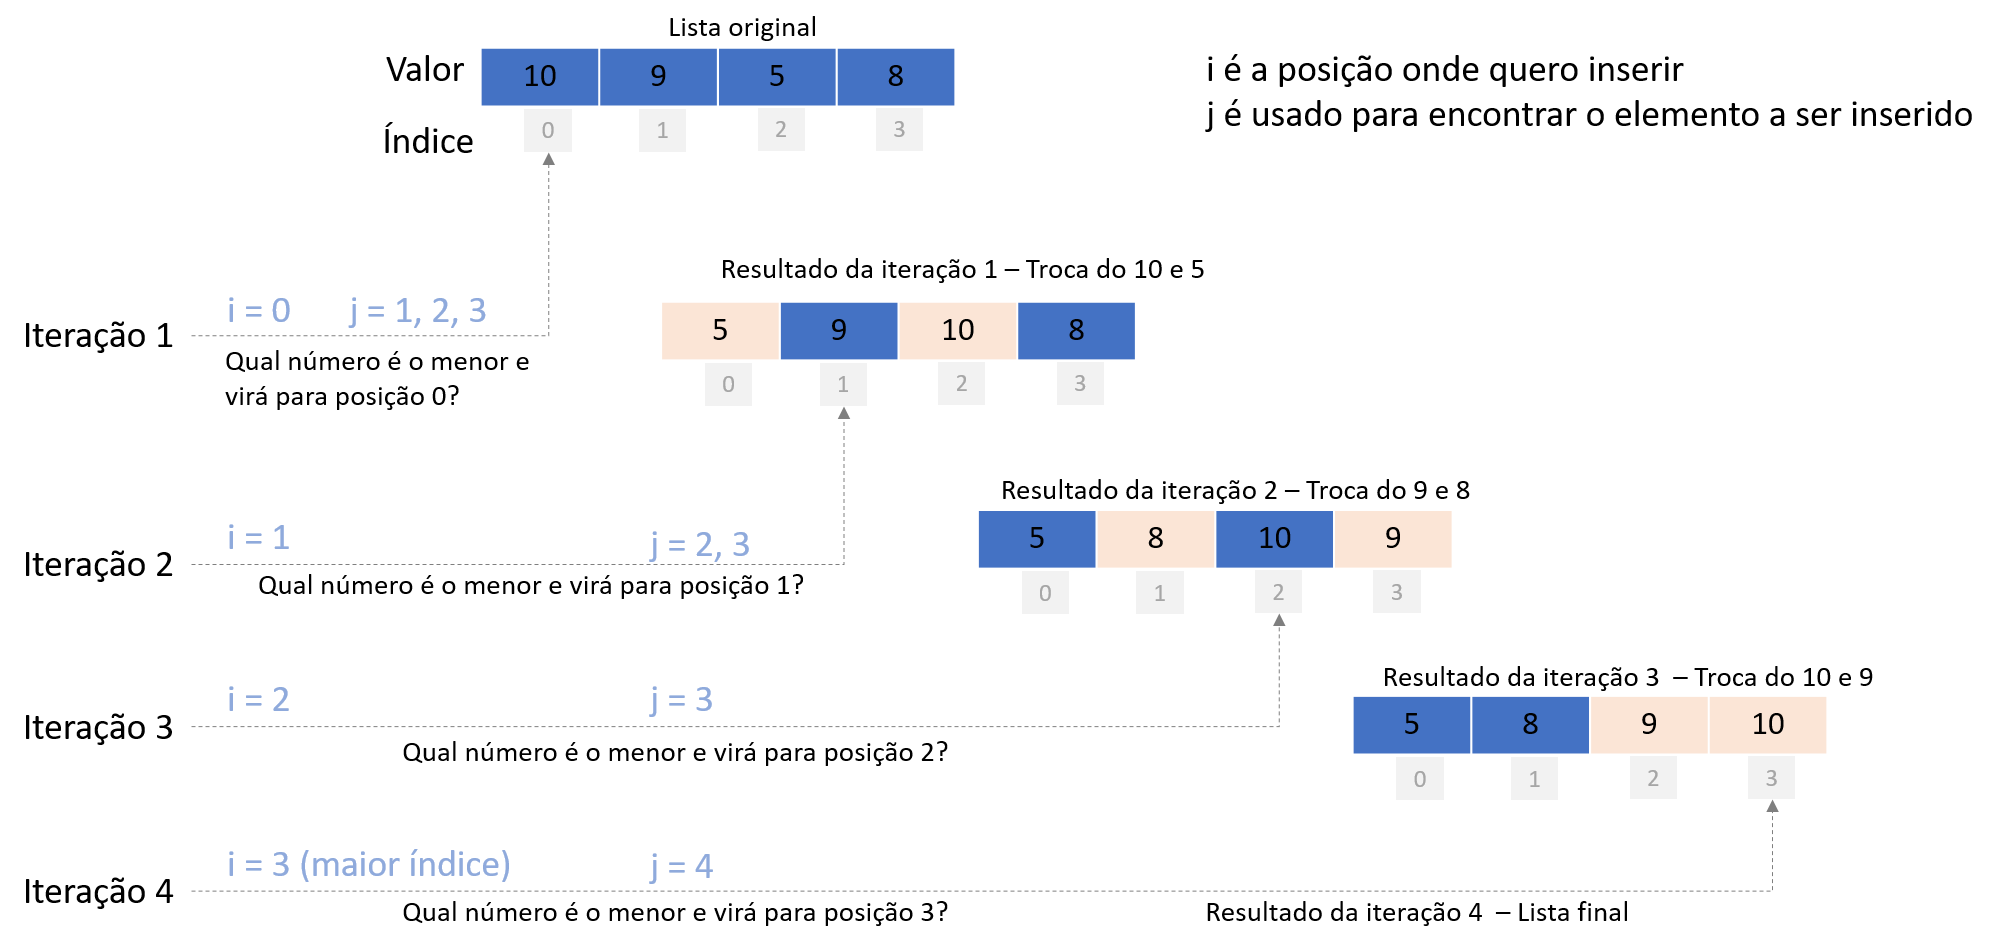

Vamos considerar a variável i como a posição onde queremos inserir o menor valor e usaremos j para percorrer a lista a procurar o menor valor. Na iteração 1, i é 0 (posição 0) e j precisa percorrer as posições 1, 2 e 3 comparando cada valor com o da posição 0. Como 5 é o menor valor da lista, então ele passa a ocupar a posição 0 ao passo que o valor 10 vai para a posição 2. Na segunda iteração, queremos inserir o menor valor, do restante da lista, na posição 1, razão pela qual j terá que percorrer as posições 2 e 3. Como 8 é o menor valor, então 8 passa a ocupar a posição 1; e 9, a posição 3. Na terceira iteração, queremos inserir o menor valor na posição 2, razão pela qual j precisa comparar com a última posição – como 9 é menor que 10, então acontece a troca. Após essa troca, i passa a valer 3, o maior índice, razão pela qual não há mais comparações a serem feitas.

Agora que sabemos como o algoritmo selection sort funciona, vamos implementá-lo na linguagem Python. Observe o código a seguir.

In [6]:
def executar_selection_sort(lista):
  n = len(lista)

  for i in range(0, n):
    index_menor = i
    for j in range(i+1, n):
      if lista[j] < lista[index_menor]:
        index_menor = j
    lista[i], lista[index_menor] = lista[index_menor], lista[i]
  return lista

lista = [10, 9, 5, 11, -1, 3]
executar_selection_sort(lista)

[-1, 3, 5, 9, 10, 11]

No código da entrada 4, temos uma variável que guarda o tamanho da lista (n). Precisamos de duas estruturas de controle para iterar, tanto para ir atualizando a posição de inserção quanto para achar o menor valor da lista. Usamos a variável i para controlar a posição de inserção e a variável j para iterar sobre os valores da lista, procurando o menor valor. A busca pelo menor valor é feita com o auxílio de uma variável com a qual, quando o menor valor for encontrado, a variável index_menor guardará a posição para a troca dos valores. Quando o valor na posição i já for o menor, então index_menor não se atualiza pelo j. Na linha 9, usamos a atribuição múltipla para fazer a troca dos valores, quando necessário.

Para ajudar na compreensão, veja essa versão do selection sort, na qual criamos uma lista vazia e, dentro de uma estrutura de repetição, usamos a função built-in min() para, a cada iteração, encontrar o menor valor da sequência e adicioná-lo na lista_ordenada. Veja que, a cada iteração, o valor adicionado à nova lista é removido da lista original.

In [7]:
def executar_selection_sort_2(lista):
    lista_ordenada = []
    while lista:
        minimo = min(lista)
        lista_ordenada.append(minimo)
        lista.remove(minimo)
    return lista_ordenada


lista = [10, 9, 5, 8, 11, -1, 3]
executar_selection_sort_2(lista)

[-1, 3, 5, 8, 9, 10, 11]

# BUBBLE SORT (ORDENAÇÃO POR "BOLHA")

O algoritmo bubble sort (algoritmo da bolha) recebe esse nome porque faz a ordenação sempre a partir do ínicio da lista, comparando um valor com seu vizinho. Para entendermos como funciona o algoritmo, suponha que exista uma fila de pessoas, mas que, por algum motivo, elas precisem ser colocadas por ordem de tamanho, do menor para o maior. Segundo o algoritmo bubble sort, a primeira pessoa da fila (pessoa A), perguntará para o segundo a altura – se o segundo for menor, então eles trocam de lugar. Novamente, a pessoa A perguntará para seu próximo vizinho qual é a altura deste – se esta for menor, eles trocam. Esse processo é repetido até que a pessoa A encontre alguém que é maior, contexto no qual essa nova pessoa vai percorrer a fila até o final fazendo a mesma pergunta. Esse processo é repetido até que todas as pessoas estejam na posição correta. A lógica do algoritmo é a seguinte:

Iteração 1: seleciona o valor na posição 0 e o compara com seu vizinho – se for menor, há troca; se não for, seleciona o próximo e compara, repentindo o processo.

Iteração 2: seleciona o valor na posição 0 e compara ele com seu vizinho, se for menor troca, senão seleciona o próximo e compara, repentindo o processo.

Iteração N - 1: seleciona o valor na posição 0 e o compara com seu vizinho – se for menor, há troca; se não for, seleciona o próximo e compara, repentindo o processo.


A Figura 2.6 ilustra o funcionando do algoritmo que ordena a lista [10, 9, 5, 8].

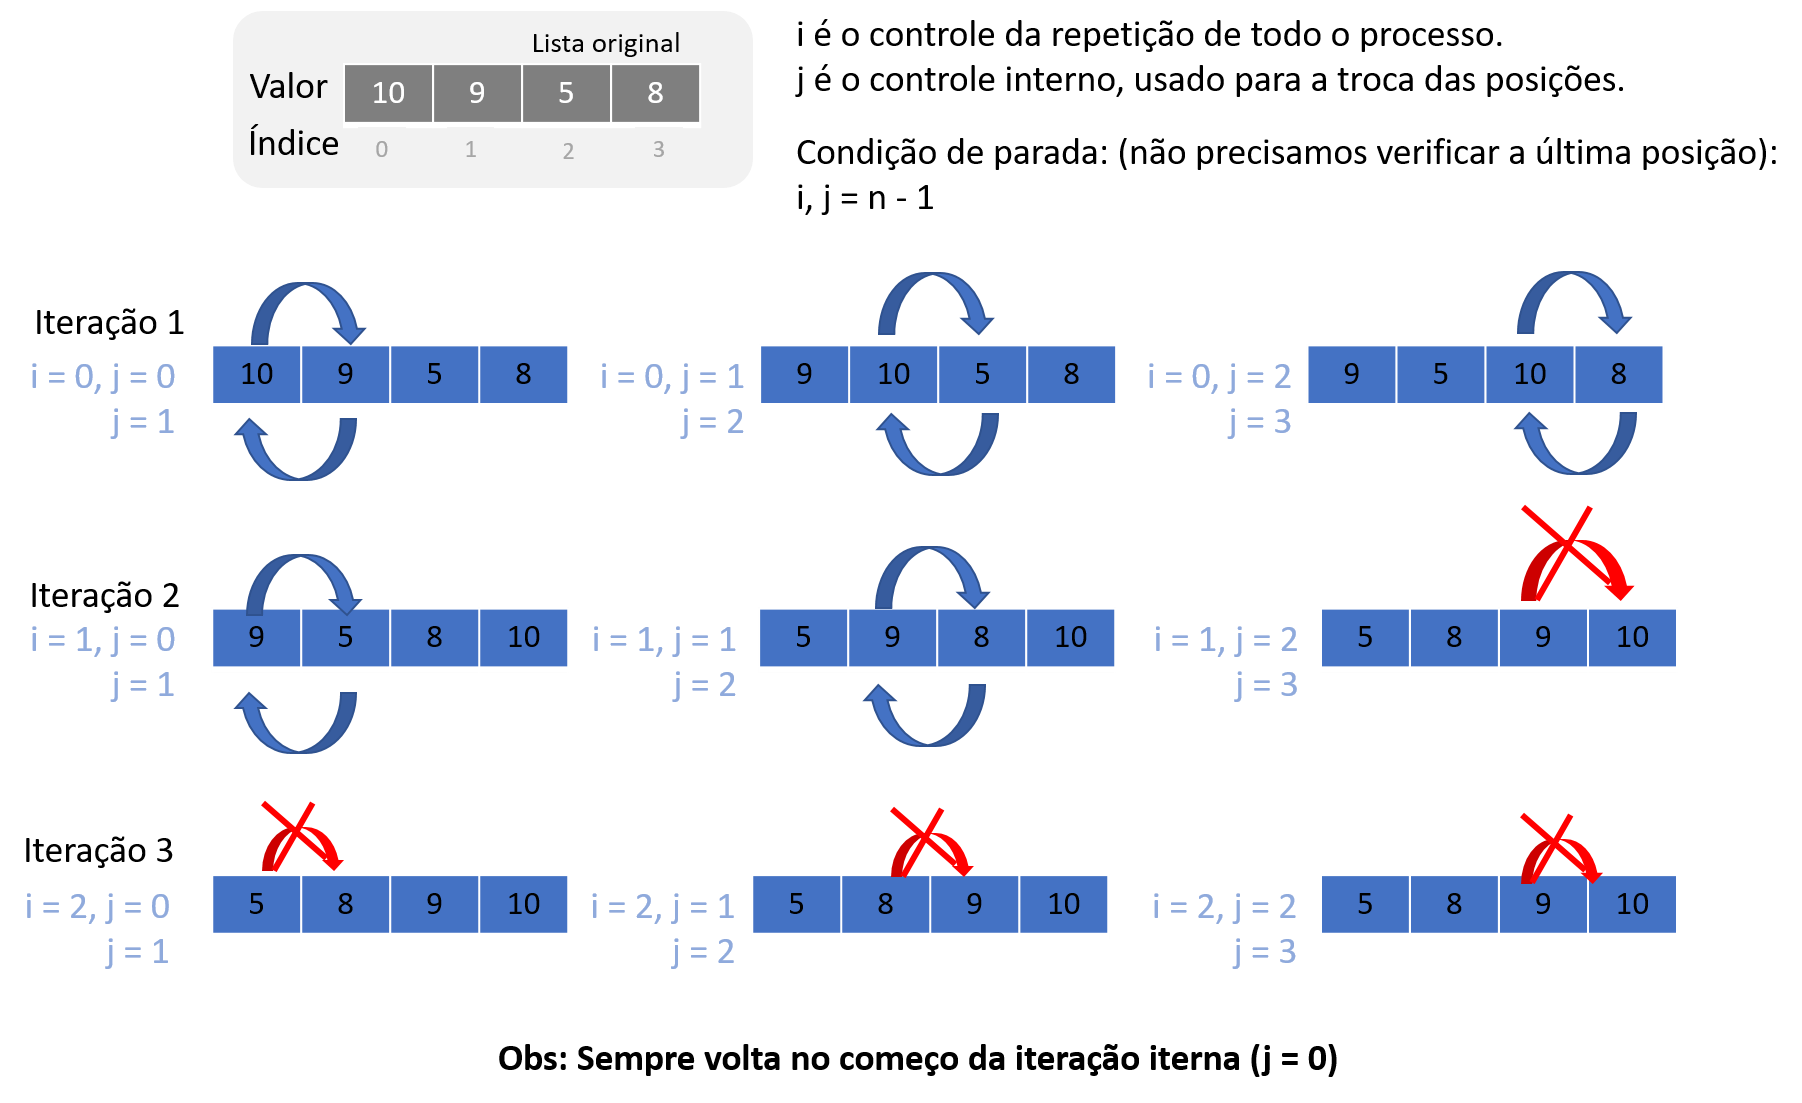

A variável i é usada para controlar a repetição de todo processo; e a variável j é usada para fazer as comparações entre os elementos. Na iteração 1, o valor 10 ocupará a posição 0, sendo, então, comparado ao valor da posição 1 (9) – como 10 é maior, então é feita a troca. Em seguida, o valor 10 é comparado a seu novo vizinho (5) – como é maior, é feita a troca. Em seguida, o valor 10 é comparado ao novo vizinho (8) – como é menor, é feita a troca. Em seguida, como não há mais vizinhos, a primeira iteração encerra. A segunda iteração, começa novamente com a comparação do valor das posições 0 e 1 – novamente, o valor 9 (posição 0) é maior que 5 (posição 1), então é feita a troca. Em seguida, 9 é comparado ao próximo vizinho 8 – como é maior, é feita a troca. Em seguida, 9 é comparado ao seu novo vizinho 10, como é menor, não é feita a troca. A terceira iteração começa novamente comparando o valor das posições 0 e 1, porém, agora, 5 é menor que 8, razão pela qual não se faz a troca. Na sequência, o valor 8 é comparado ao seu vizinho 9 – como é menor, não é feita a troca. Na sequência, o valor 9 é comparado ao seu vizinho 10 – como é menor, não é feita a troca, quando, então, se encerra o algoritmo.

Agora que sabemos como o algoritmo bubble sort funciona, vamos implementá-lo na linguagem Python. Observe o código a seguir.

In [8]:
def executar_bubble_sort(lista):
  n = len(lista)

  for i in range(n-1):
    for j in range(n-1):
      if lista[j] > lista[j + 1]:
        lista[j], lista[j + 1] = lista[j + 1], lista[j]
  return lista

lista = [10, 9, 5, 8, 11, -1, 3]
executar_bubble_sort(lista)

[-1, 3, 5, 8, 9, 10, 11]

No código da entrada 5, temos uma variável que guarda o tamanho da lista (n). Precisamos de duas estruturas de controle para iterar, tanto para controlar a bolha, que é a quantidade de vezes que a comparação voltará para o início, quanto para controlar as comparações entre vizinhos. Usamos a variável i para o controle da bolha e a j para fazer as comparações entre vizinhos. Veja que, na linha 5, fazemos a comparação – caso o valor antecessor seja maior que o de seu sucessor, então é feita a troca de posições na linha 6; caso contrário, o valor de j é incremento, e uma nova comparação é feita, até que tenham sido comparados todos valores.

# INSERTION SORT (ORDENAÇÃO POR INSERÇÃO)

O algoritmo insertion sort (algoritmo de inserção) recebe esse nome porque faz a ordenação pela simulação da inserção de novos valores na lista. Para entendermos como funciona o algoritmo, imagine um jogo de cartas para a execução do qual cada jogador começa com cinco cartas e, a cada rodada, deve pegar e inserir uma nova carta na mão. Para facilitar, o jogador opta por deixar as cartas ordenadas em sua mão, razão pela qual, a cada nova carta que precisar inserir, ele olha a sequência da esquerda para a direita, procurando a posição exata para fazer a inserção. A lógica do algoritmo é a seguinte:

Início: parte-se do princípio de que a lista possui um único valor e, consequentemente, está ordenada.

Iteração 1: parte-se do princípio de que um novo valor precisa ser inserido na lista; nesse caso, ele é comparado com o valor já existente para saber se precisa ser feita uma troca de posição.

Iteração 2: parte-se do princípio de que um novo valor precisa ser inserido na lista; nesse caso, ele é comparado com os valores já existentes para saber se precisam ser feitas trocas de posição.

Iteração N: parte-se do princípio de que um novo valor precisa ser inserido na lista; nesse caso, ele é comparado com todos os valores já existentes (desde o início) para saber se precisam ser feitas trocas de posição.

A Figura 2.7 ilustra o funcionando do algoritmo que ordena a lista [10, 9, 5, 8]. 

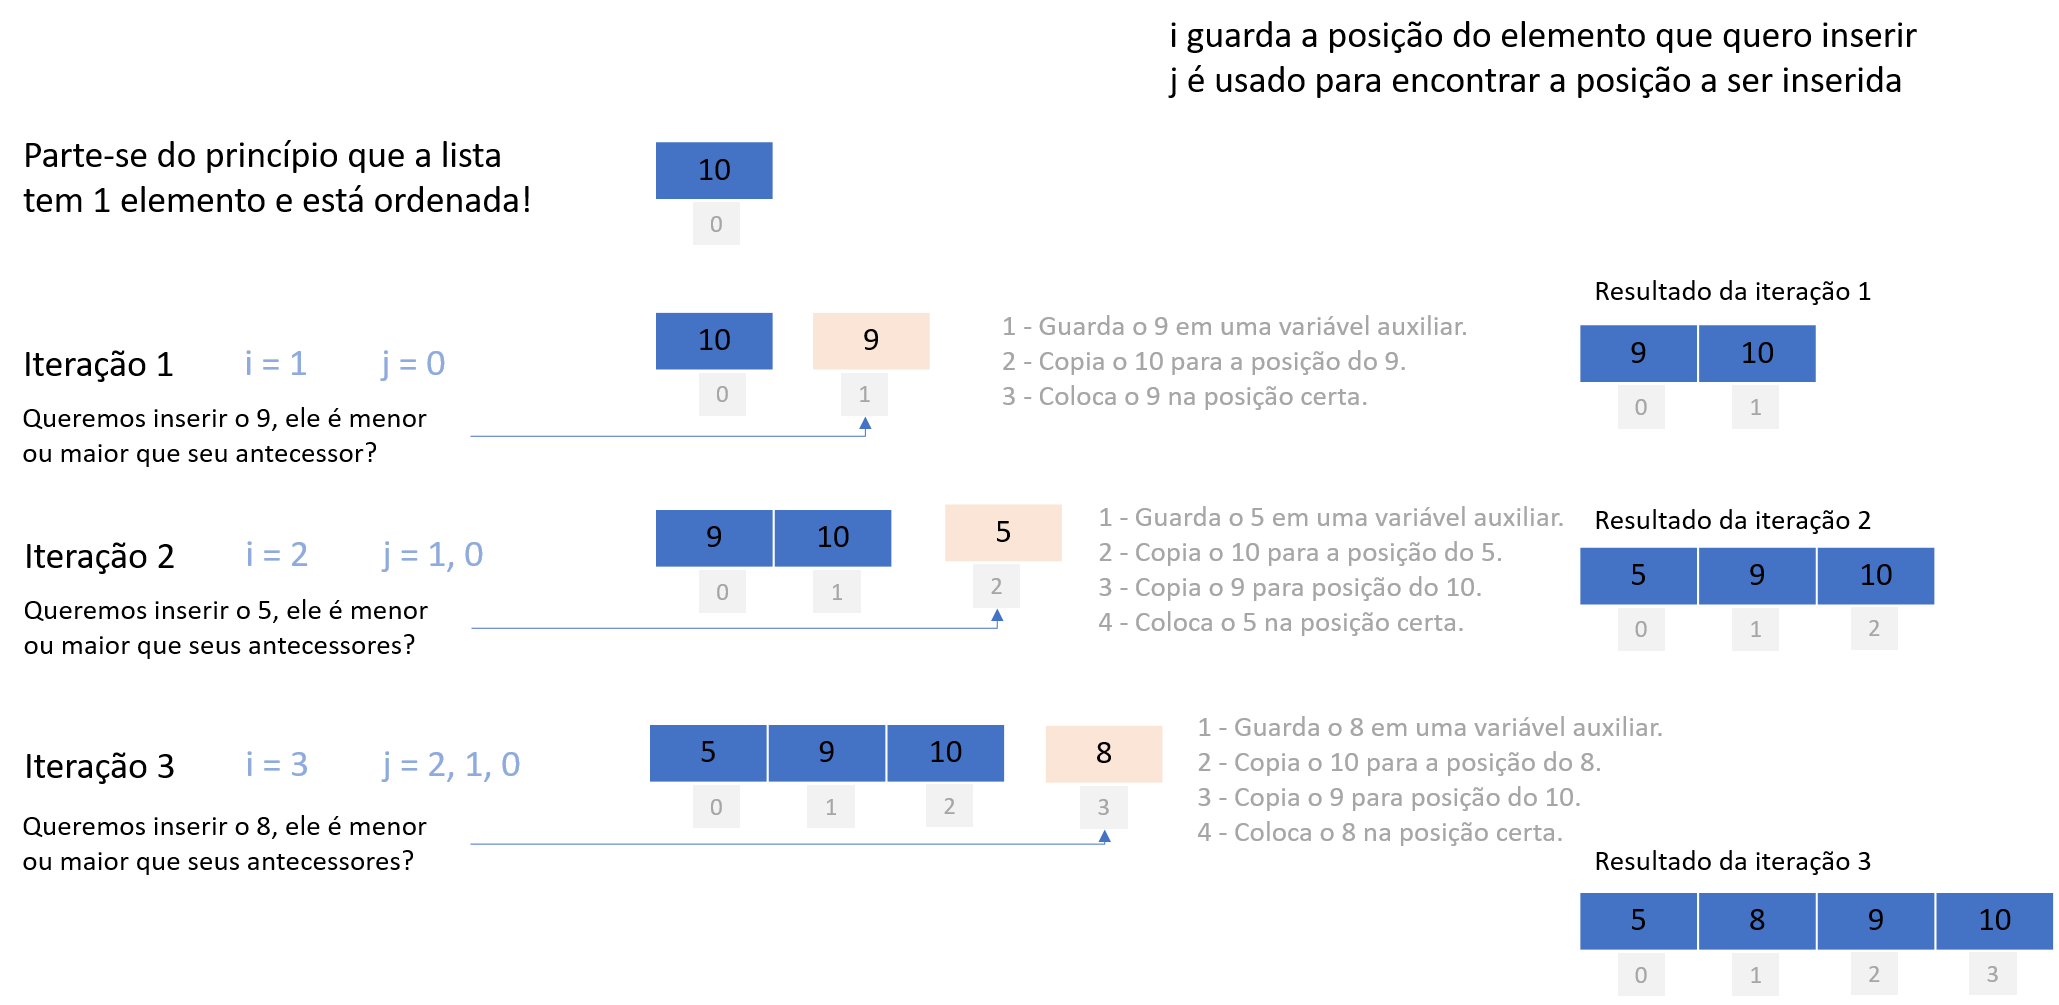

A variável i é usada para guardar a posição do elemento que queremos inserir, e a variável j é usada para encontrar a posição correta a ser inserida. Ou seja, j será usada para percorrer as posições já preenchidas. O primeiro valor da lista é 10, razão pela qual se parte do princípio de que a lista só possui esse valor e está ordenada. Na primeira iteração, em que o valor 9 precisa ser inserido na lista, ele deve ser inserido na posição 0 ou 1? Como é menor, é feita a troca com o 10. Na segunda iteração, queremos inserir o valor 5, razão pela qual ele é comparado a todos seus antecessores para encontrar a posição correta – como é menor que todos eles, então 5 é alocado na posição 0 e todos os demais são deslocados "para frente". Na terceira iteração, queremos inserir o valor 8, razão pela qual ele é comparado a todos seus antecessores para encontrar a posição correta e, então, é alocado para a posição 1. Todos os outros valores são deslocados "para frente".

Agora que sabemos como o algoritmo insertion sort funciona, vamos implementá-lo na linguagem Python. Observe o código a seguir.

In [9]:
def executar_insertion_sort(lista):
  n = len(lista)
  for i in range(1, n):
    valor_inserir = lista[i]
    j = i - 1

    while j >= 0 and lista[j] > valor_inserir:
      lista[j + 1] = lista[j]
      j -= 1
    lista[j + 1] = valor_inserir

  return lista

lista = [10, 9, 5, 8, 11, -1, 3]
executar_insertion_sort(lista)

[-1, 3, 5, 8, 9, 10, 11]

No código da entrada 6, temos uma variável que guarda o tamanho da lista (n). Precisamos de duas estruturas de controle para iterar. Na primeira estrutura (linha 3), usamos o for para controlar a variável i, que representa a posição do valor a ser inserido. Uma vez que sabemos exatamente quantas vezes iterar, o for pode ser usado. Observe que o for começa na posição 1, pois o algoritmo parte do princípio de que a lista possui um valor e um novo precisa ser inserido. Na linha 5, inicializamos a variável j, com a posição anterior ao valor a ser inserido. Na linha 7, criamos a segunda estrutura de repetição com while, pois não sabemos quantas casas vamos ter de percorrer até encontrar a posição correta de inserção. Veja que o loop acontecerá enquanto houver elementos para comparar (j >= 0) e o valor da posição anterior (lista[j]) for maior que o valor a ser inserido. Enquanto essas condições acontecerem, os valores já existentes vão sendo "passados para frente" (linha 8) e j vai decrementando (linha 9). Quando a posição for encontrada, o valor é inserido (linha 10).

Para todas as ordenações que fizemos até o momento, o tempo de execução foi instantâneo, pois as listas eram pequenas. E, se tivéssemos que ordenar uma lista com muitos valores, certamente perceberíamos uma lentidão na performance. Para suprir essa necessidade, existem algoritmos que, embora performem melhor, demandam um pouco mais de complexidade na implementação. Vamos, então, conhecer os algoritmos merge sort e quick sort.

# MERGE SORT (ORDENAÇÃO POR JUNÇÃO)

O algoritmo merge sort recebe esse nome porque faz a ordenação em duas etapa: (i) divide a lista em sublistas; e (ii) junta (merge) as sublistas já ordenadas. Esse algoritmo é conhecido por usar a estratégia "dividir para conquistar" (STEPHENS, 2013). Essa estratégia é usada por algoritmos de estrutura recursiva: para resolver um determinado problema, eles se chamam recursivamente uma ou mais vezes para lidar com subproblemas intimamente relacionados. Esses algoritmos geralmente seguem uma abordagem de dividir e conquistar: eles dividem o problema em vários subproblemas semelhantes ao problema original, mas menores em tamanho, resolvem os subproblemas recursivamente e depois combinam essas soluções para criar uma solução para o problema original (CORMEN et al., 2001). O paradigma de dividir e conquistar envolve três etapas em cada nível da recursão: (i) dividir o problema em vários subproblemas; (ii) conquistar os subproblemas, resolvendo-os recursivamente – se os tamanhos dos subproblemas forem pequenos o suficiente, apenas resolva os subproblemas de maneira direta; (iii) combine as soluções dos subproblemas na solução do problema original.

Etapa de divisão:

1. Com base na lista original, encontre o meio e separe-a em duas listas: esquerda_1 e direita_2.

2. Com base na sublista esquerda_1, se a quantidade de elementos for maior que 1, encontre o meio e separe-a em duas listas: esquerda_1_1 e direta_1_1.

3. Com base na sublista esquerda_1_1, se a quantidade de elementos for maior que 1, encontre o meio e separe-a em duas listas: esquerda_1_2 e direta_1_2.

4. Repita o processo até encontrar uma lista com tamanho 1.

5. Chame a etapa de merge.

6. Repita o processo para todas as sublistas.

Para entender a etapa de junção do merge sort, suponha que você está vendo duas fileiras de crianças em ordem de tamanho. Ao olhar para a primeira criança de cada fila, é possível identificar qual é a menor e, então, colocá-la na posição correta. Fazendo isso sucessivamente, teremos uma fila ordenada com base nas duas anteriores.

Etapa de merge:

1. Dadas duas listas, cada uma das quais contém 1 valor – para ordenar, basta comparar esses valores e fazer a troca, gerando uma sublista com dois valores ordenados.

2. Dadas duas listas, cada uma das quais contém 2 valores – para ordenar, basta ir escolhendo o menor valor em cada uma e gerar uma sublista com quatro valores ordenados.

3. Repita o processo de comparação e junção dos valores até chegar à lista original, agora ordenada.

A Figura 2.8 ilustra o funcionamento do algoritmo, ordenando a lista [10, 9, 5, 8].
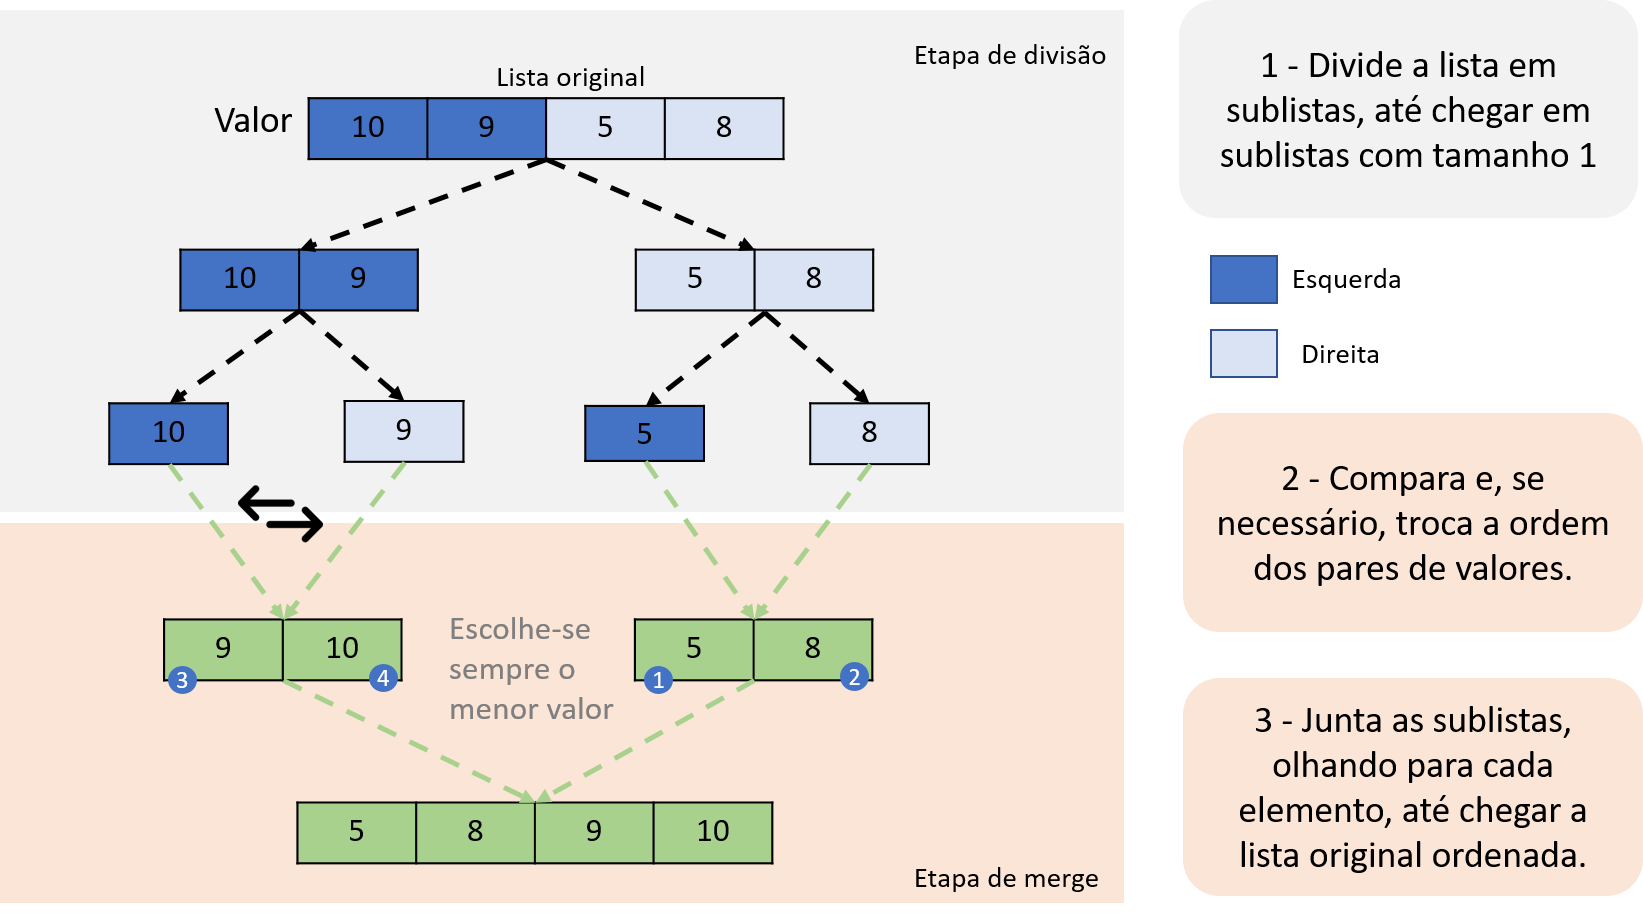


Começando pela etapa de divisão, é encontrado o meio da lista e é feita uma divisão, o que resulta nas sublistas [10, 9] do lado esquerdo e [5, 8] do lado direito. Como as sublistas possuem mais que um valor, então é feita uma quebra novamente – a sublista da esquerda gera duas novas listas [10] e [9]; e a sublista da direita, as novas listas [5] e [8]. Alcançado o tamanho mínimo da lista, é hora de começar o processo de merge, que fará a junção de forma ordenada. Começando pela esquerda, as listas [10] e [9] são comparadas, gerando a sublista [9, 10]. Do outro lado, as listas [5] e [8] são comparadas, gerando a sublista [5, 8]. Agora é hora de fazer o novo merge entre essas sublistas de tamanho 2. Para facilitar a compreensão, podemos pensar nessas listas como pilhas ordenadas, no topo das quais está o menor valor de cada uma. Então, ao olhar para o topo de duas pilhas, vemos os valores 9 e 5 – como 5 é menor, ele é o primeiro escolhido para ocupar a posição 0. Olhando novamente para essa pilha, agora temos no topo os valores 9 e 8 – como 8 é menor, então ele é o segundo escolhido para compor a nova lista. Olhando novamente, agora temos somente uma pilha, em cujo topo está o valor 9, razão pela qual ele é escolhido e, por fim, o valor 10 é selecionado. Como não existem mais merges para serem feitos, o algoritmo encerra.

Agora que sabemos como o algoritmo merge sort funciona, vamos implementá-lo na linguagem Python. Como já mencionamos, esse algoritmo possui mais complexidade de código. Primeiro ponto: vamos precisar de duas funções, uma que divide e outra que junta. Segundo ponto: a divisão é feita de maneira lógica, ou seja, as sublistas são "fatiamentos" da lista original. O algoritmo de merge vai sempre receber a lista inteira, mas tratará de posições específicas. Terceiro ponto: na etapa de divisão, serão feitas sucessivas subdivisões aplicando-se a mesma regra, tarefa para cuja realização vamos usar a técnica de recursão, fazendo chamadas recursivas a função de divisão. Caso você não se lembre do funcionamento das funções recursivas, recomendamos os seguintes vídeos:


No canal Me Salva!, em vídeo de 5 minutos: Programação em C - PLC20 - Recursão, a partir do minuto 1:23 é exibido um exemplo clássivo da recursão. A partir do minuto 2:54, é explicado como a função recursiva se comporta, fazendo chamadas sucessivas até encontrar o caso base, que dará o retorno para as funções. O vídeo está disponível no endereço https://bit.ly/3ijla9N.


No canal Bóson Treinamentos, em vídeo de 16 minutos: 29 - Curso de Python - Funções - Recursividade, é feita a explicação da técnica de recursão, além de serem feitas duas implementações, uma com e outra sem recursão, para o mesmo problema. O vídeo está disponível no endereço https://bit.ly/3dNib5T.
Agora que já relembramos a técnica de recusão, observe o código a seguir, que implementa o merge sort.

In [12]:
def executar_merge_sort(lista):
  if len(lista) <= 1: return lista
  else:
    meio = len(lista) // 2
    esquerda = executar_merge_sort(lista[:meio])
    direita = executar_merge_sort(lista[meio:])
    return executar_merge(esquerda, direita)

def executar_merge(esquerda, direita):
  sub_lista_ordenada = []
  topo_esquerda, topo_direita = 0, 0
  while topo_esquerda < len(esquerda) and topo_direita < len(direita):
    if esquerda[topo_esquerda] <= direita[topo_direita]:
      sub_lista_ordenada.append(esquerda[topo_esquerda])
      topo_esquerda += 1
    else:
      sub_lista_ordenada.append(direita[topo_direita])
      topo_direita += 1
  sub_lista_ordenada += esquerda[topo_esquerda:]
  sub_lista_ordenada += direita[topo_direita:]
  return sub_lista_ordenada

lista = [10, 9, 5, 8, 11, -1, 3]
executar_merge_sort(lista)

[-1, 3, 5, 8, 9, 10, 11]

Na entrada 7, criamos nossa função de ordenação por merge sort, que, na verdade, são duas funções, uma para dividir as listas (executar_merge_sort) e outra para fazer o merge (executar_merge). A função que faz a divisão recebe como parâmetro a lista a ser ordenada. Na linha 2, se o tamanho da lista é menor ou igual 1, isso significa que a sublista só tem 1 valor e está ordenada, razão pela qual seu valor é retornado; caso não seja, então é encontrado o meio da lista e feita a divisão entre sublistas da direita e da esquerda. Esse processo é feito recursivamente até que se tenha sublistas de tamanho 1.

A função de junção, ao receber duas listas, percorre cada uma delas pelo while na linha 13, e, considerando cada valor, o que for menor é adicionado à sublista ordenada.

# QUICKSORT (ORDENAÇÃO RÁPIDA)

Dado um valor em uma lista ordenada, à direita desse número existem somente números maiores que ele; e à esquerda, somente os menores. Esse valor, chamado de pivô, é a estratégia central no algoritmo quicksort. O algoritmo quicksort também trabalha com a estratégia de dividir para conquistar, pois, a partir do pivô, quebrará uma lista em sublistas (direita e esquerda) – a cada escolha do pivô e a cada quebra da lista, o processo de ordenação vai acontecendo. Para entendermos como o algoritmo funciona, suponha uma fila de pessoas que, por algum motivo, precisam ser ordenadas por ordem de tamanho. Pede-se para uma pessoa da fila se voluntariar para ter seu tamanho comparado (esse é o pivô). Com base nesse voluntário, todos que são menores que ele devem se dirigir para a esquerda e todos que são maiores para a direta. O voluntário está na posição ordenada. Vamos repetir o mesmo procedimento para os menores e maiores. A cada passo estamos dobrando o número de pessoas na posição final. A lógica é a seguinte:

1. Primeira iteração: a lista original será quebrada através de um valor chamado de pivô. Após a quebra, os valores que são menores que o pivô devem ficar à sua esquerda e os maiores à sua direita. O pivô é inserido no local adequado, trocando a posição com o valor atual.

2. Segunda iteração: agora há duas listas, a da direita e a da esquerda do pivô. Novamente são escolhidos dois novos pivôs e é feito o mesmo processo, de colocar à direita os menores e à esquerda os maiores. Ao final os novos pivôs ocupam suas posições corretas.

3. Terceira iteração: olhando para as duas novas sublistas (direita e esquerda), repete-se o processo de escolha dos pivôs e separação.

4. Na última iteração, a lista estará ordenada, como resultado dos passos anteriores.

Para nosso exemplo e implementação, vamos escolher o pivô como sempre o último valor da lista e das sublistas. 

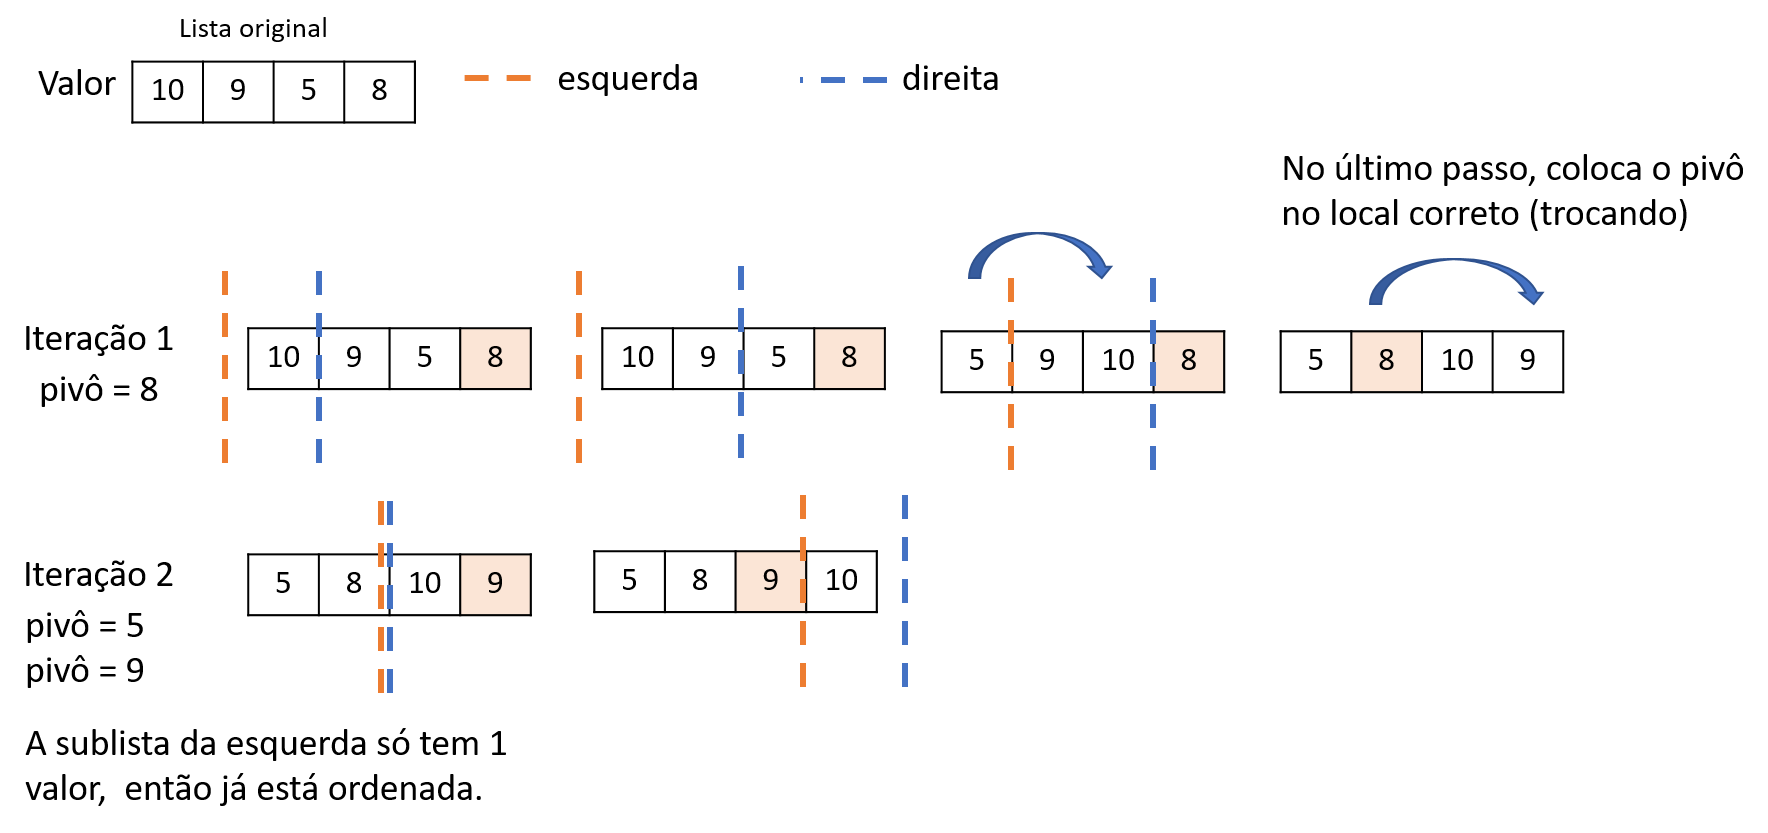

A Figura 2.9 ilustra o funcionamento do algoritmo quicksort. Dada uma lista a ser ordenada [10, 9, 5, 8], na primeira iteração o pivô é escolhido, o qual, no nosso caso, é o valor 8. Agora, para cada valor da lista, o pivô será comparado e acontecerá uma separação da lista em duas sublistas: à esquerda do pivô, os valores menores; e à direita, os valores maiores. No passo 1, movemos a linha que representa a sublista da direita, pois 10 é maior que o pivô. No passo 2, também movemos essa linha, pois 9 é maior que o pivô. No passo 3, movemos a linha da direita (porque sempre vamos fazer a comparação com os elementos da frente), mas movemos também a linha da esquerda, visto que 5 é menor que o pivô. Veja que, nesse movimento, os valores das posições são trocados: 5 passa a ocupar a posição da linha da esquerda, e o valor que ali estava vai para a posição da direita. Como não há mais elementos para comparar, uma vez que alcançamos o pivô, então ele é colocado no seu devido lugar, que está representado pela linha da esquerda. Para essa inserção, é feita a troca do valor que ali está com o valor do pivô. Veja que 8 passa a ocupar a posição 1, ao passo que 9 vai para a posição do pivô. Agora, todo o processo precisa se repetir, considerando-se, agora, as sublistas da esquerda e da direita. Na esquerda, temos uma sublista de tamanho 1 (valor 5), razão pela qual não há nada a ser feito. Por sua vez, na direita, temos a sublista [10, 9], razão pela qual se adota 9 como o pivô dela. Como o pivô é menor que o primeiro elemento dessa sublista, então o marcado da direita avança, mas o da esquerda também, fazendo a troca dos valores. Como não há mais comparações a serem feitas, o algoritmo encerra com a lista ordenada.

Agora que sabemos como o algoritmo quicksort funciona, vamos implementá-lo na linguagem Python. Assim como o merge sort, o quicksort será implementado em duas funções, uma vez que o mesmo processo vai se repetir várias vezes. Observe o código a seguir.

In [15]:
def executar_quicksort(lista, inicio, fim):
  if inicio < fim:
    pivo = executar_particao(lista, inicio, fim)
    executar_quicksort(lista, inicio, pivo-1)
    executar_quicksort(lista, pivo+1, fim)
  return lista

def executar_particao(lista, inicio, fim):
  pivo = lista[fim]
  esquerda = inicio
  for direita in range(inicio, fim):
    if lista[direita] <= pivo:
      lista[direita], lista[esquerda] = lista[esquerda], lista[direita]
      esquerda += 1
  lista[esquerda], lista[fim] = lista[fim], lista[esquerda]
  return esquerda

lista = [10, 9, 5, 8, 11, -1, 3]
executar_quicksort(lista, inicio=0, fim=len(lista)-1)

[-1, 3, 5, 8, 9, 10, 11]

Na entrada 8 implementamos nosso quicksort em duas funções: executar_quicksort e executar_particao. A função executar_quicksort é responsável por criar as sublistas, cada uma das quais, no entanto, deve ser criada com base em um pivô. Por isso, caso a posição de início da lista seja menor que o fim (temos mais que 1 elemento), então é chamada a função executar_particao, que de fato faz a comparação e, quando necessário, troca os valores de posição, além de retornar o índice correto para o pivô. Na linha 10, fazemos a definição do pivô como o último valor da lista (e mesmo da sublista). Na linha 11, criamos a variável que controla a separação da lista da esquerda, ou seja, a lista que guardará os valores menores que o pivô. Usamos a estrutura de repetição para ir comparando o pivô com todos os valores da lista à direita. A cada vez que um valor menor que o pivo é encontrado (linha 13), é feita a troca dos valores pelas posições (linha 14), e a delimitação da lista dos menores (esquerda) é atualizada (linha 15). Na linha 16, o pivô é colocado na sua posição (limite da lista esquerda), fazendo a troca com o valor que ali está. Por fim, a função retorna o índice do pivô.

Para ajudar na compreensão do quicksort, veja esta outra implementação do algoritmo, na qual usamos list comprehensions para criar uma lista de pivôs (agora o pivô é o primeiro valor da lista), uma lista com os valores menores e uma com os valores maiores. Esse processo é chamado recursivamente até que a lista esteja ordenada.

In [16]:
def executar_quicksort_2(lista):
    if len(lista) <= 1: return lista    
    pivo = lista[0]
    iguais  = [valor for valor in lista if valor == pivo]
    menores = [valor for valor in lista if valor <  pivo]
    maiores = [valor for valor in lista if valor >  pivo]
    return executar_quicksort_2(menores) + iguais + executar_quicksort_2(maiores)


lista = [10, 9, 5, 8, 11, -1, 3]
executar_quicksort_2(lista)

[-1, 3, 5, 8, 9, 10, 11]